In [1]:
from scipy.stats import kurtosis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,plot_confusion_matrix, confusion_matrix

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA, FastICA, NMF
from sklearn.random_projection import GaussianRandomProjection

clusterings = ['KMeans','EM']
dimReductions = ['PCA','ICA', 'RP', 'IG']
thisDR = 'initial'

In [2]:
###### E-coli 
### http://archive.ics.uci.edu/ml/datasets/Ecoli
# data = pd.read_csv('datafiles/ecoli.csv')))  # very unbalanced
# class_names = np.array(['cp', 'im', 'imL', 'imS', 'imU','om','omL','pp'])
data = pd.read_csv('datafiles/ecoli-balance.csv') # balanced: merged sub-species of E-coli
class_names = np.array(['cp', 'im', 'om','pp'])
y_data = data.Y
x_data = data.loc[:,'X1':'X7']

In [3]:
one_hot = OneHotEncoder()

y_data_hot = one_hot.fit_transform(y_data.values.reshape(-1, 1)).todense()
# y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()
y_data_hot.shape

(336, 4)

In [4]:

le = LabelEncoder()
le.fit(y_data.values.tolist())
y_data_le = le.transform(y_data)
y_data_le.shape

(336,)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_hot, train_size=0.7, random_state=my_random_state, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(235, 7) (101, 7) (235, 4) (101, 4)


In [7]:
# one_hot.inverse_transform(y_train)

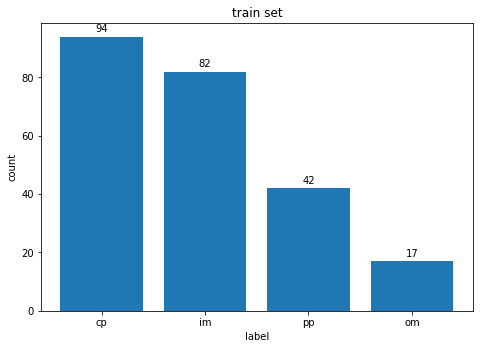

In [7]:
# train set

counts = np.zeros(4)
for y in one_hot.inverse_transform(y_train):
    if y=='cp':
        counts[0] += 1
    elif y=='im':
        counts[1] += 1
    elif y=='pp':
        counts[2] += 1
    elif y=='om':
        counts[3] += 1


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
species = ['cp','im','pp','om']
rects = ax.bar(species, counts)
plt.title('train set')
plt.xlabel('label')
plt.ylabel('count')
plt.savefig('part1/trainset.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()

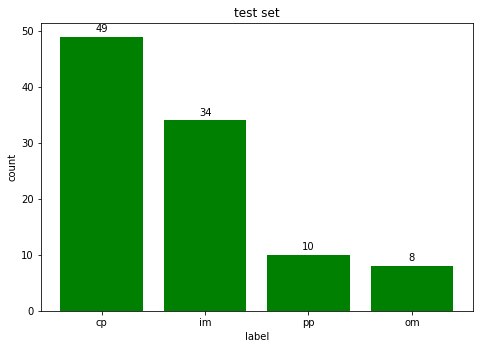

In [8]:
# test set

# clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(4)
for y in one_hot.inverse_transform(y_test):
    if y=='cp':
        counts[0] += 1
    elif y=='im':
        counts[1] += 1
    elif y=='pp':
        counts[2] += 1
    elif y=='om':
        counts[3] += 1
counts

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
species = ['cp','im','pp','om']
rects = ax.bar(species, counts, color = 'green')
plt.title('test set')
plt.xlabel('label')
plt.ylabel('count')
plt.savefig('part1/testset.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()

# 1.1. k-means clustering

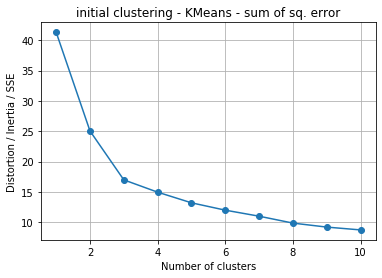

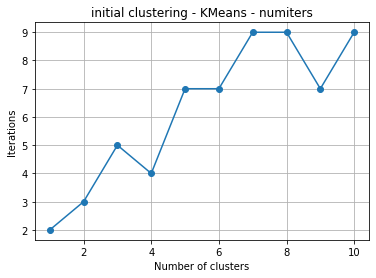

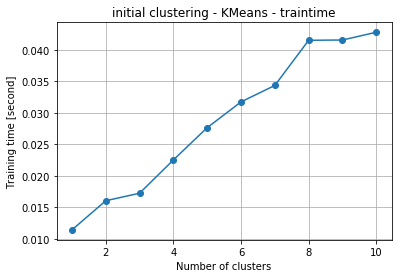

In [9]:
thisClust = 'KMeans'
# calculate distortion for a range of number of cluster
distortions = []
numiters = []
traintime = []
for i in range(1, 11):
#     print(f'k={i}')
    km = KMeans(n_clusters=i, 
#                 init='random',
#                 n_init=10, 
#                 max_iter=300,
#                 tol=1e-04, 
                random_state=my_random_state)
    
    tic = time.perf_counter() 
    km.fit(x_train)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
#     print(f"training time {toc - tic} seconds")
    print()
    
    distortions.append(km.inertia_)
    numiters.append(km.n_iter_)

# plot
plt.figure()
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion / Inertia / SSE')
plt.title('initial clustering - KMeans - sum of sq. error')
plt.grid()
plt.savefig('part1/initial_KMeans_distortion.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 11), numiters, marker='o')
plt.title('initial clustering - KMeans - numiters')
plt.xlabel('Number of clusters')
plt.ylabel('Iterations')
plt.grid()
plt.savefig('part1/initial_KMeans_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(range(1, 11), traintime, marker='o')
plt.title('initial clustering - KMeans - traintime')
plt.xlabel('Number of clusters')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig('part1/initial_KMeans_traintime.png')
plt.show()

In [10]:
# the best n_clusters determined to be 4 (same as the original labeling)
km4 = KMeans(n_clusters = 4, random_state = my_random_state)


tic = time.perf_counter() 
km4.fit(x_train)
toc = time.perf_counter() 
# train_time[0] = toc-tic
print(f"training time {toc - tic} seconds")
print()

print(km4.cluster_centers_)
print(km4.labels_)
print(km4.inertia_)
print(km4.n_iter_)

training time 0.026328299999988758 seconds

[[0.2825     0.4534375  0.48       0.5        0.480625   0.5446875
  0.5409375 ]
 [0.67540984 0.68819672 0.53114754 0.50819672 0.50377049 0.47377049
  0.33262295]
 [0.61637681 0.49594203 0.49507246 0.5        0.55521739 0.76768116
  0.78217391]
 [0.36547945 0.3890411  0.48       0.5        0.45369863 0.28041096
  0.36520548]]
[0 3 1 2 2 3 1 1 2 1 3 0 1 1 2 0 3 3 2 3 3 3 3 3 2 3 3 3 0 3 1 2 2 2 1 2 3
 1 1 1 1 1 0 2 2 0 1 0 1 3 0 3 2 2 3 3 2 2 3 3 1 0 2 2 1 3 3 1 1 3 1 3 0 3
 1 2 1 1 3 3 1 0 0 3 3 1 3 3 1 2 0 0 1 3 3 1 2 2 3 3 2 0 2 0 2 0 2 1 3 2 0
 1 0 3 1 2 3 2 1 1 3 2 1 2 3 1 0 2 1 2 1 2 1 3 2 1 2 2 0 2 3 1 3 0 2 2 2 2
 3 2 3 0 3 1 3 3 3 1 2 1 2 0 3 3 2 1 1 3 0 1 3 1 3 1 2 3 2 2 2 1 2 2 3 3 2
 2 1 2 1 3 3 3 3 0 1 3 3 2 0 3 2 1 0 2 3 2 0 0 1 0 1 3 2 2 1 1 2 2 3 0 2 2
 1 2 1 3 2 2 3 3 1 1 2 3 3]
14.95992103272871
4


In [11]:
species = ['om','pp','im','cp']
x_train_km = []
for l in km4.labels_:
    x_train_km.append(species[l])


[[72  0 18  4]
 [ 0 68 12  2]
 [ 0  0  0 17]
 [ 1  1  2 38]]
Prediction accuracy on train set: 0.7574468085106383


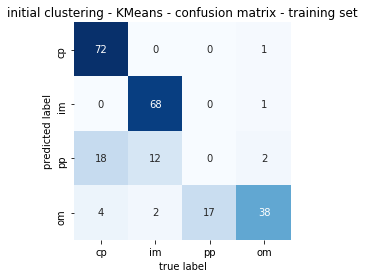

In [12]:
train_confmat_km = confusion_matrix(one_hot.inverse_transform(y_train), x_train_km)
train_accu_km = accuracy_score(one_hot.inverse_transform(y_train), x_train_km)
print(train_confmat_km)

print(f"Prediction accuracy on train set: {train_accu_km}")


import seaborn as sns
species.reverse() # for plotting
sns.heatmap(train_confmat_km.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title('initial clustering - KMeans - confusion matrix - training set')
plt.savefig('part1/initial_KMeans_confusion_train.png')


In [13]:
# Evaluate quality of clusters
print('training set')
print('Inertia: ', km4.inertia_)
score = silhouette_score(x_train, km4.labels_)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_train).reshape(-1), x_train_km)
print('Adjusted Mutual Information (AMI) score: ', ami)

training set
Inertia:  14.95992103272871
Silhouette score:  0.33784152947066454
Adjusted Mutual Information (AMI) score:  0.6346157271948746


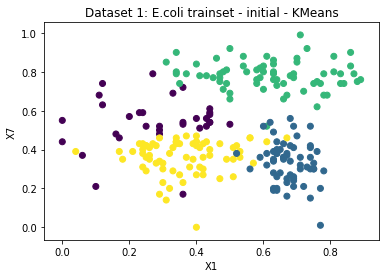

In [14]:
plt.scatter(x_train.X1,x_train.X7, c=km4.labels_, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part1/{thisDR}_{thisClust}_scatter_train4.png')
plt.show()

In [15]:


tic = time.perf_counter() 
x_test_predict = km4.predict(x_test)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

species = ['om','pp','im','cp']
y_test_km = []
for pred in x_test_predict:
    y_test_km.append(species[pred])
    
# print(f"Prediction accuracy on test set: {accuracy_score(one_hot.inverse_transform(y_test),y_test_km)}")
# # best_test_accuracy[0] = accuracy_score(y_test,y_test_dt)


testing time 0.001129500000047301 seconds



[[42  0  7  0]
 [ 1 28  3  2]
 [ 0  0  0  8]
 [ 0  0  0 10]]
Prediction accuracy on test set: 0.7920792079207921


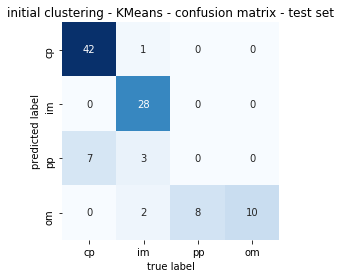

In [16]:
test_confmat_km = confusion_matrix(one_hot.inverse_transform(y_test), y_test_km)
test_accu_km = accuracy_score(one_hot.inverse_transform(y_test), y_test_km)
print(test_confmat_km)
print(f"Prediction accuracy on test set: {test_accu_km}")


species.reverse() # for plotting
sns.heatmap(test_confmat_km.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title('initial clustering - KMeans - confusion matrix - test set')
plt.savefig('part1/initial_KMeans_confusion_test.png')

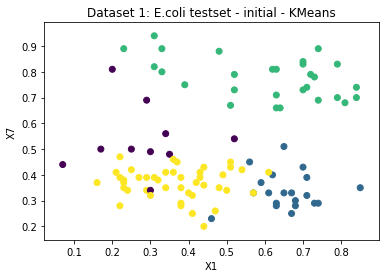

In [17]:
plt.scatter(x_test.X1,x_test.X7, c=x_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli testset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part1/{thisDR}_{thisClust}_scatter_test4.png')
plt.show()

In [18]:
# Evaluate quality of clusters
print('test set')
score = silhouette_score(x_test, x_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_test).reshape(-1), y_test_km)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.3088002883081247
Adjusted Mutual Information (AMI) score:  0.6933222250474882


# 1.2. Expectation Maximization (EM)

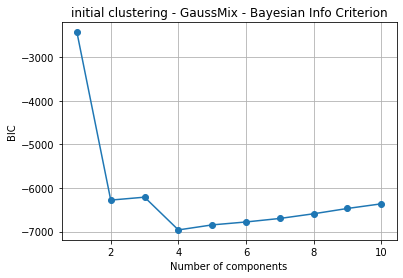

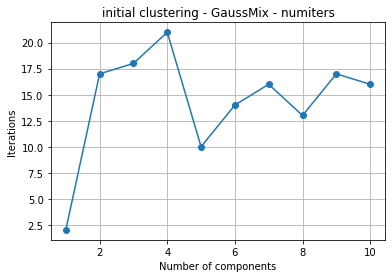

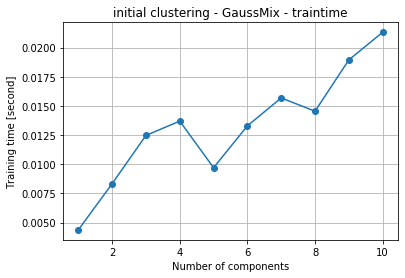

In [19]:
thisClust = 'GaussMix'
# Find the optimal number of components using BIC
n_components_grid = np.arange(1, 11)
# bic = np.zeros(n_components_grid.size)
bic = []
numiters = []
traintime = []

# for idx, n_components in enumerate(n_components_grid):
for n_components in n_components_grid:
    gm = GaussianMixture(n_components=n_components, random_state=my_random_state)
    
    tic = time.perf_counter() 
    gm.fit(x_train)
    toc = time.perf_counter() 
    traintime.append(toc-tic)
    
    numiters.append(gm.n_iter_)
    bic.append(gm.bic(x_train))
#     bic[idx] = gm.bic(x_train)
print()


# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid, bic, marker='o')
# plt.xticks(k_grid)
plt.title('initial clustering - GaussMix - Bayesian Info Criterion')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.grid()
plt.savefig('part1/initial_gm_bic.png')

# plot
plt.figure()
plt.plot(n_components_grid, numiters, marker='o')
plt.title('initial clustering - GaussMix - numiters')
plt.xlabel('Number of components')
plt.ylabel('Iterations')
plt.grid()
plt.savefig('part1/initial_gm_numiters.png')
plt.show()


# plot
plt.figure()
plt.plot(n_components_grid, traintime, marker='o')
plt.title('initial clustering - GaussMix - traintime')
plt.xlabel('Number of components')
plt.ylabel('Training time [second]')
plt.grid()
plt.savefig('part1/initial_gm_traintime.png')
plt.show()

In [20]:
# 5 is determined to be the best number of components
best_n_component = 5
gm5 = GaussianMixture(n_components=best_n_component, random_state=my_random_state)


tic = time.perf_counter() 
gm5.fit(x_train)
toc = time.perf_counter() 

print(f"training time {toc - tic} seconds")
print()

y_train_predict = gm5.predict(x_train)
y_train_predict

training time 0.011432600000034654 seconds



array([3, 3, 0, 1, 1, 3, 0, 3, 1, 2, 3, 1, 0, 0, 1, 3, 3, 0, 1, 3, 3, 3,
       0, 3, 1, 3, 3, 3, 3, 3, 0, 1, 1, 1, 2, 4, 3, 0, 0, 3, 0, 0, 0, 1,
       1, 3, 0, 0, 0, 3, 3, 0, 1, 1, 3, 3, 1, 1, 3, 3, 0, 0, 1, 0, 0, 0,
       3, 0, 0, 3, 2, 3, 3, 3, 0, 1, 0, 0, 3, 0, 2, 3, 3, 3, 3, 0, 3, 0,
       0, 1, 3, 3, 0, 3, 3, 0, 1, 1, 0, 3, 1, 3, 1, 4, 1, 3, 1, 0, 3, 1,
       1, 0, 3, 0, 0, 1, 3, 1, 0, 0, 3, 1, 0, 1, 3, 0, 3, 1, 0, 1, 0, 1,
       0, 3, 1, 0, 1, 4, 3, 1, 3, 0, 3, 3, 1, 1, 1, 1, 3, 1, 0, 3, 3, 0,
       3, 3, 3, 0, 1, 2, 1, 0, 3, 3, 1, 0, 0, 3, 3, 0, 3, 0, 3, 0, 1, 3,
       1, 1, 1, 0, 1, 1, 3, 0, 1, 1, 0, 1, 0, 3, 3, 3, 3, 3, 2, 3, 3, 1,
       1, 0, 1, 0, 3, 1, 3, 1, 3, 1, 0, 3, 0, 3, 1, 1, 0, 0, 1, 1, 3, 3,
       1, 1, 0, 1, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3], dtype=int64)

In [21]:
# Evaluate quality of clusters
print('training set')
score = silhouette_score(x_train, y_train_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_train).reshape(-1), y_train_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)
# print(f"Prediction accuracy on train set: {accuracy_score(one_hot.inverse_transform(y_train),y_train_predict)}")

training set
Silhouette score:  0.3403953180803581
Adjusted Mutual Information (AMI) score:  0.5705102300230023


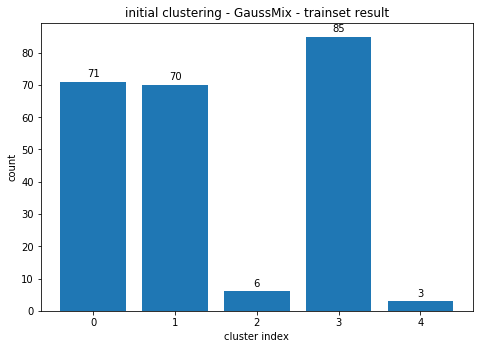

In [22]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for yp in y_train_predict:
    counts[yp] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices,counts)

def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.title('initial clustering - GaussMix - trainset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig('part1/initial_gm_train_result.png')
plt.show()

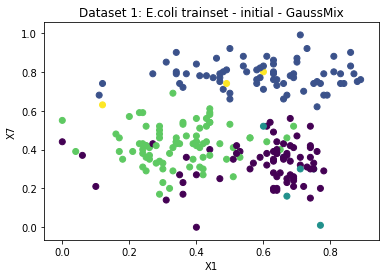

In [24]:
plt.scatter(x_train.X1,x_train.X7, c=y_train_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part1/{thisDR}_{thisClust}_scatter_train.png')
plt.show()

In [25]:


tic = time.perf_counter() 
y_test_predict = gm5.predict(x_test)
toc = time.perf_counter() 
# test_time[0] = toc-tic
print(f"testing time {toc - tic} seconds")
print()

y_test_predict

testing time 0.00159489999998641 seconds



array([1, 0, 0, 1, 3, 3, 0, 0, 1, 3, 1, 0, 1, 3, 3, 3, 3, 0, 1, 0, 0, 3,
       3, 1, 1, 1, 1, 0, 3, 0, 3, 1, 3, 3, 1, 1, 0, 3, 1, 1, 0, 1, 1, 3,
       0, 3, 3, 3, 3, 3, 1, 0, 3, 3, 1, 1, 3, 0, 3, 0, 3, 2, 0, 0, 3, 0,
       1, 3, 3, 0, 1, 3, 3, 3, 3, 0, 3, 0, 3, 3, 1, 3, 0, 0, 3, 4, 0, 3,
       3, 0, 3, 1, 3, 1, 0, 0, 3, 1, 1, 0, 3], dtype=int64)

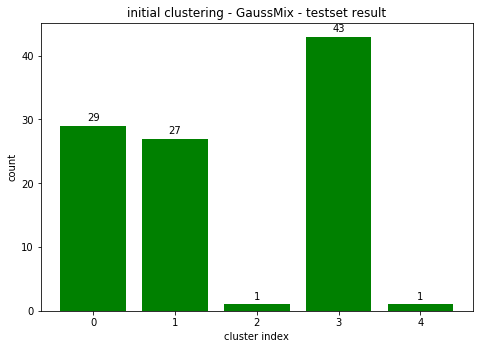

In [26]:
clusterindices = [str(e) for e in range(best_n_component)]
counts = np.zeros(best_n_component)
for p in y_test_predict:
    counts[p] += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(clusterindices, counts, color = 'green')
plt.title('initial clustering - GaussMix - testset result')
plt.xlabel('cluster index')
plt.ylabel('count')
plt.savefig('part1/initial_gm_test_result.png')
def autolabel2(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel2(rects)

plt.show()


In [27]:
# Evaluate quality of clusters
print('test set')
# test_accu_km = accuracy_score(one_hot.inverse_transform(y_test), y_test_gm)
# print(f"Prediction accuracy on test set: {test_accu_gm}")
score = silhouette_score(x_test, x_test_predict)
print('Silhouette score: ', score)
ami = adjusted_mutual_info_score(one_hot.inverse_transform(y_test).reshape(-1), y_test_predict)
print('Adjusted Mutual Information (AMI) score: ', ami)

test set
Silhouette score:  0.3088002883081247
Adjusted Mutual Information (AMI) score:  0.636295201844576


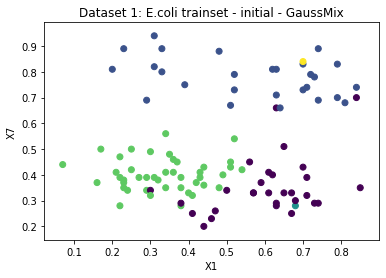

In [28]:
plt.scatter(x_test.X1,x_test.X7, c=y_test_predict, cmap='viridis')
# plt.colorbar();  # show color scale
plt.title(f'Dataset 1: E.coli trainset - {thisDR} - {thisClust}')
plt.xlabel('X1')
plt.ylabel('X7')
plt.savefig(f'part1/{thisDR}_{thisClust}_scatter_test.png')
plt.show()

# 没用的

In [ ]:
species = ['om','pp','im','cp']
y_train_gm = []
for l in y_train_predict:
    y_train_gm.append(species[l])


train_confmat_gm = confusion_matrix(one_hot.inverse_transform(y_train), y_train_gm)
train_accu_gm = accuracy_score(one_hot.inverse_transform(y_train), y_train_gm)
print(train_confmat_gm)

print(f"Prediction accuracy on train set: {train_accu_gm}")


species.reverse() # for plotting
sns.heatmap(train_confmat_gm.T, cmap=plt.cm.Blues, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=species, yticklabels=species)
plt.xlabel('true label')
plt.ylabel('predicted label')

plt.title('initial clustering - GaussMix - confusion matrix - training set')
plt.savefig('part1/initial_gm_confusion_train.png')


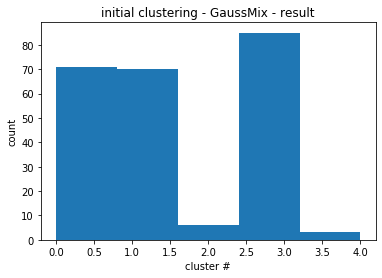

In [28]:

# plot
plt.figure()
plt.hist(y_train_predict, bins = best_n_component)
plt.title('initial clustering - GaussMix - result')
plt.xlabel('cluster #')
plt.ylabel('count')
# plt.grid()
plt.savefig('part1/initial_gm_result.png')
plt.show()

